In [1]:
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium as fl
import wordcloud as wc
from wordcloud import STOPWORDS,WordCloud
import collections
import seaborn as sbn
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer,PorterStemmer
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
months = ['\\april','\\febrouary','\march']
months2 = ['febrouary','march','april']
files = ['\listings.csv','\listings0.csv']
# inputPath= r"C:\Users\myrto\Desktop\data"
inputPath= r"C:\Users\nikol\Desktop\dataMining_p1\data\data"
columnlist = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights','host_id']

framelist = []
monthlist = []
i=0
for month in months:
    for file in files:
        tempfile = pd.read_csv(inputPath+month+file,index_col=False)
        tempframe = pd.DataFrame(data=tempfile)
        framelist.append(tempframe)
    for l in range(0,len(framelist)-1):
        train = framelist[0].combine_first(framelist[l+1])
    df = pd.DataFrame(data = train, columns=columnlist)
    df.drop_duplicates(subset='id',ignore_index=True,inplace=True)
    df.insert(loc=len(df.columns),column='month_id',value=months2[i])
    monthlist.append(df)
    i=i+1

df = pd.concat(monthlist)
df['price'] = df['price'].apply(lambda x: x.translate(str.maketrans({',':'','$':''})))
df['price'] = pd.to_numeric(df['price'])

df.replace(to_replace='ΠΑΓΚΡΑΤΙ',value='Pangrati',inplace=True)
df.replace(to_replace='ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ',value='Emporiko Trigono-Plaka',inplace=True)
df.replace(to_replace='ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ',value='Agios Konstantinos-Plateia Vathis',inplace=True)
df.replace(to_replace='ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',value=' Mouseio-Exarcheia-Neapoli',inplace=True)
df.replace(to_replace='ΠΕΝΤΑΓΩΝΟ',value='Pentagono',inplace=True)

for x in df.select_dtypes('number').columns:
    df[x].fillna(df[x].mean(),inplace=True)
df.fillna(method='backfill',inplace=True)
df.dropna(inplace=True)
df.to_csv("train.csv")

In [3]:
temp = df[['id','neighbourhood']]
# reviews = r'C:\Users\myrto\Desktop\data\april\reviews.csv'
# reviews0 = r'C:\Users\myrto\Desktop\data\april\reviews0.csv'
reviews = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews.csv'
reviews0 = r'C:\Users\nikol\Desktop\dataMining_p1\data\data\april\reviews0.csv'
reviews = pd.read_csv(reviews,usecols=['id','comments'])
reviews0 = pd.read_csv(reviews0)
reviews = pd.DataFrame(data=reviews)
reviews0 = pd.DataFrame(data=reviews0)
reviews = reviews.combine_first(reviews0)
reviews.dropna(inplace=True)

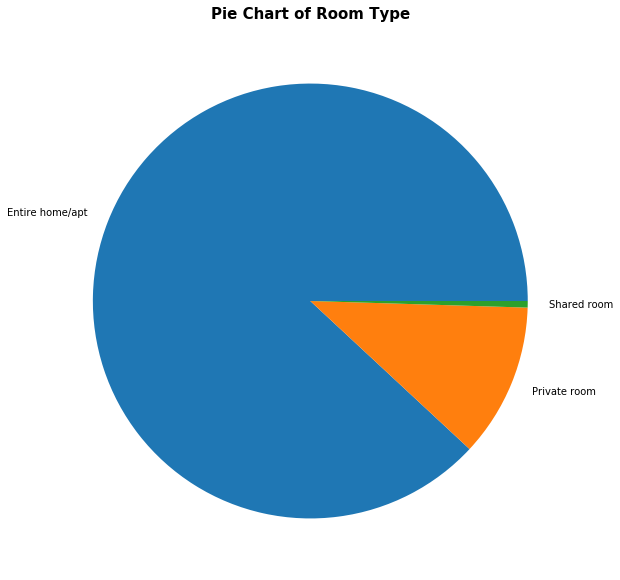

In [5]:
# 1
dt = df['room_type'].value_counts()
dt.plot(kind='pie',figsize=(10,10),title='Most frequent room type',fontsize=10)
plt.title("Pie Chart of Room Type",fontweight='bold',fontsize=15,pad=10)
plt.ylabel("")
plt.show()

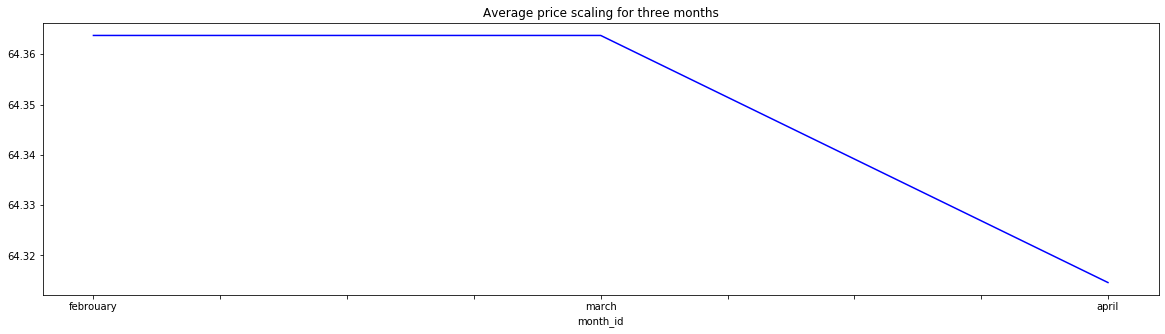

In [154]:
# 2
groupbymonth = df.groupby(by='month_id',sort=False)['price'].mean().plot(kind='line',x='per_month',y='price',color='blue',figsize=(20,5),title='Average price scaling for three months')

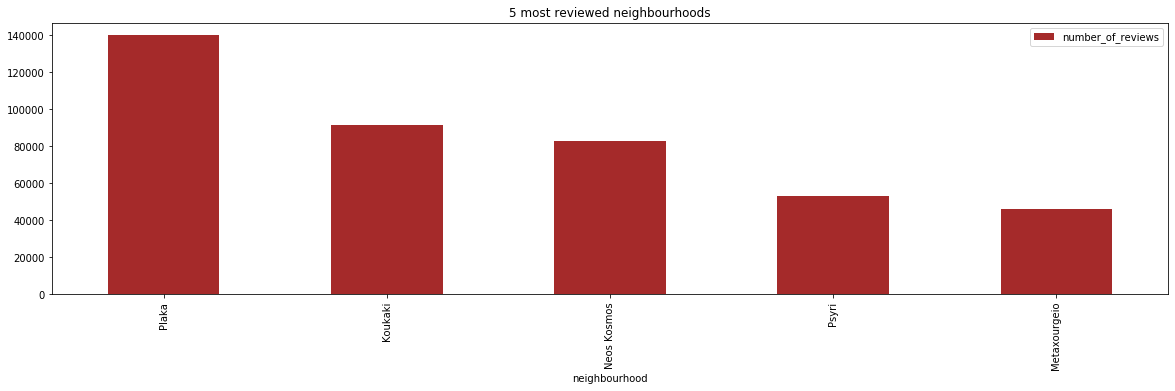

In [155]:
# 3
temp = df[['neighbourhood','number_of_reviews']].groupby('neighbourhood',as_index=False).sum()
temp = temp.sort_values(['number_of_reviews'],ascending=False)
temp.head(5).plot.bar(x='neighbourhood',color='brown',figsize=(20,5),title='5 most reviewed neighbourhoods')


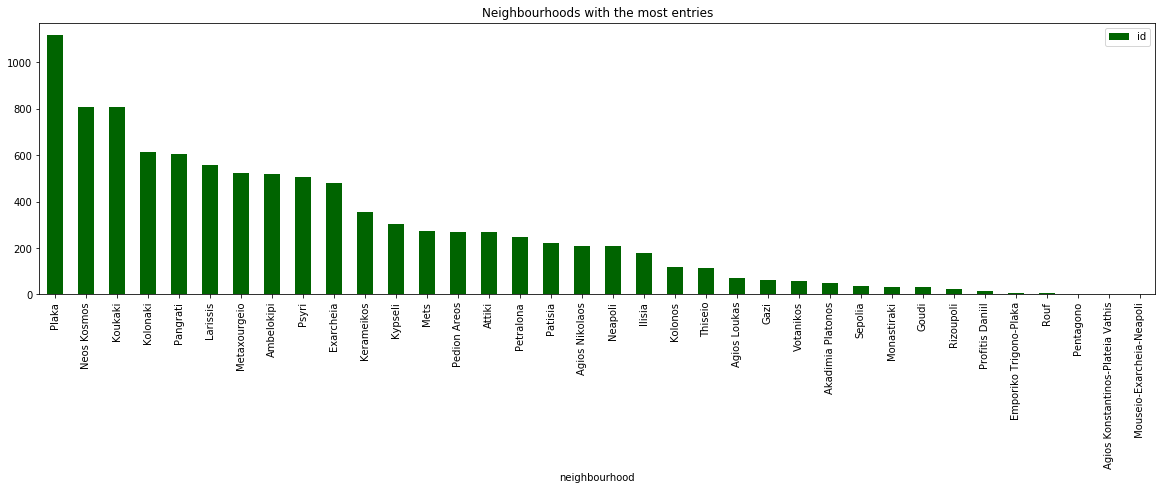

In [161]:
#4
df.groupby(by='neighbourhood',as_index=False).agg({'id':'nunique'}).sort_values(['id'],ascending=False,ignore_index=True).plot.bar(x='neighbourhood',color='darkgreen',figsize=(20,5),title='Neighbourhoods with the most entries')

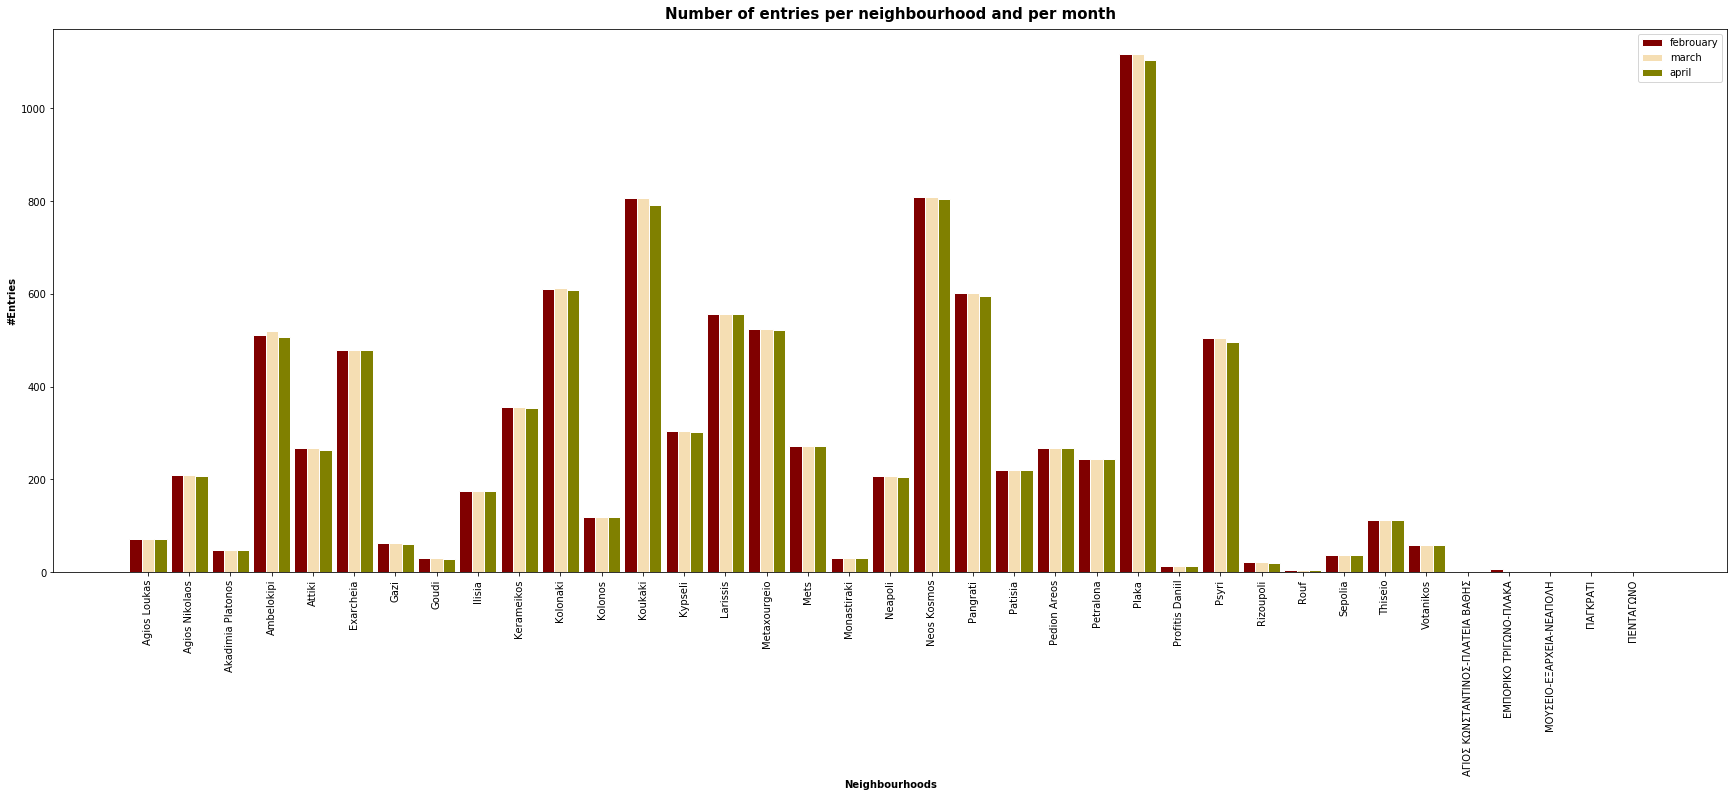

In [66]:
#5
d = {}
templist = []
aprilList = []
marchList = []
febrouaryList = []
groupbyMonth = df
groupbyMonth = groupbyMonth.groupby(['neighbourhood','month_id']).agg({'id':'count'}).reset_index()
groupbyMonth = groupbyMonth.rename(columns = {'id':'Count'})
groupbyMonth.apply(lambda row : templist.append(tuple([row['neighbourhood'],row['month_id'],row['Count']])),axis=1)

for neighbourhood,month,count in templist:
    d[neighbourhood] = {'april':0,'march':0,'febrouary':0}

for neighbourhood,month,count in templist:
    d[neighbourhood][month] = count

neighbourhoodList = [x for x in d.keys()]
for x in neighbourhoodList:
    aprilList.append(d[x]['april'])
    marchList.append(d[x]['march'])
    febrouaryList.append(d[x]['febrouary'])

barWidth = 0.3
plt.figure(figsize=(30,10))
# Set position of bar on X axis
r1 = np.arange(len(neighbourhoodList))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, febrouaryList, color='maroon', width=barWidth, edgecolor='white', label='febrouary')
plt.bar(r2, marchList, color='wheat', width=barWidth, edgecolor='white', label='march')
plt.bar(r3, aprilList, color='olive', width=barWidth, edgecolor='white', label='april')
 
# Add xticks on the middle of the group bars
plt.title('Number of entries per neighbourhood and per month',fontweight='bold',fontsize=15,pad=10)
plt.xlabel('Neighbourhoods', fontweight='bold',fontsize=10)
plt.ylabel('#Entries', fontweight='bold',fontsize=10)
plt.xticks([r + 0.3 for r in range(len(neighbourhoodList))], neighbourhoodList,rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()

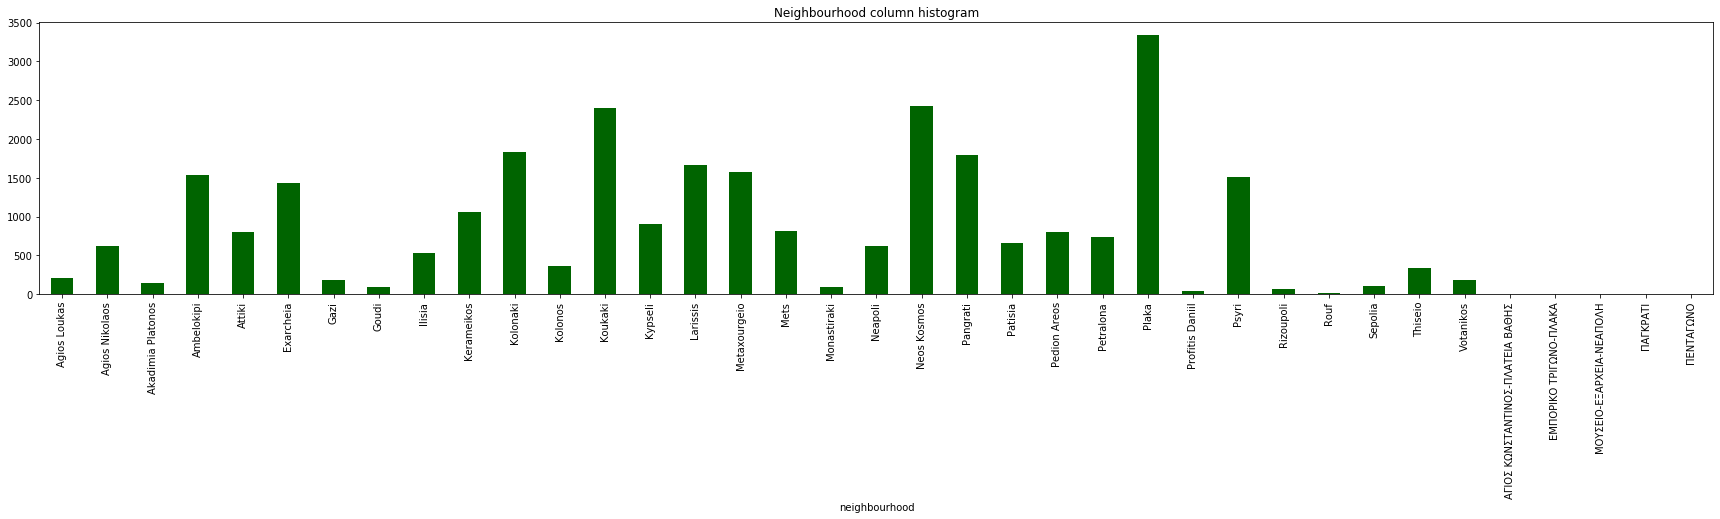

In [77]:
#6
graph = df.groupby(by='neighbourhood').size()
graph.plot.bar(y='Count',color='darkgreen',figsize=(30,5),title='Neighbourhood column histogram')

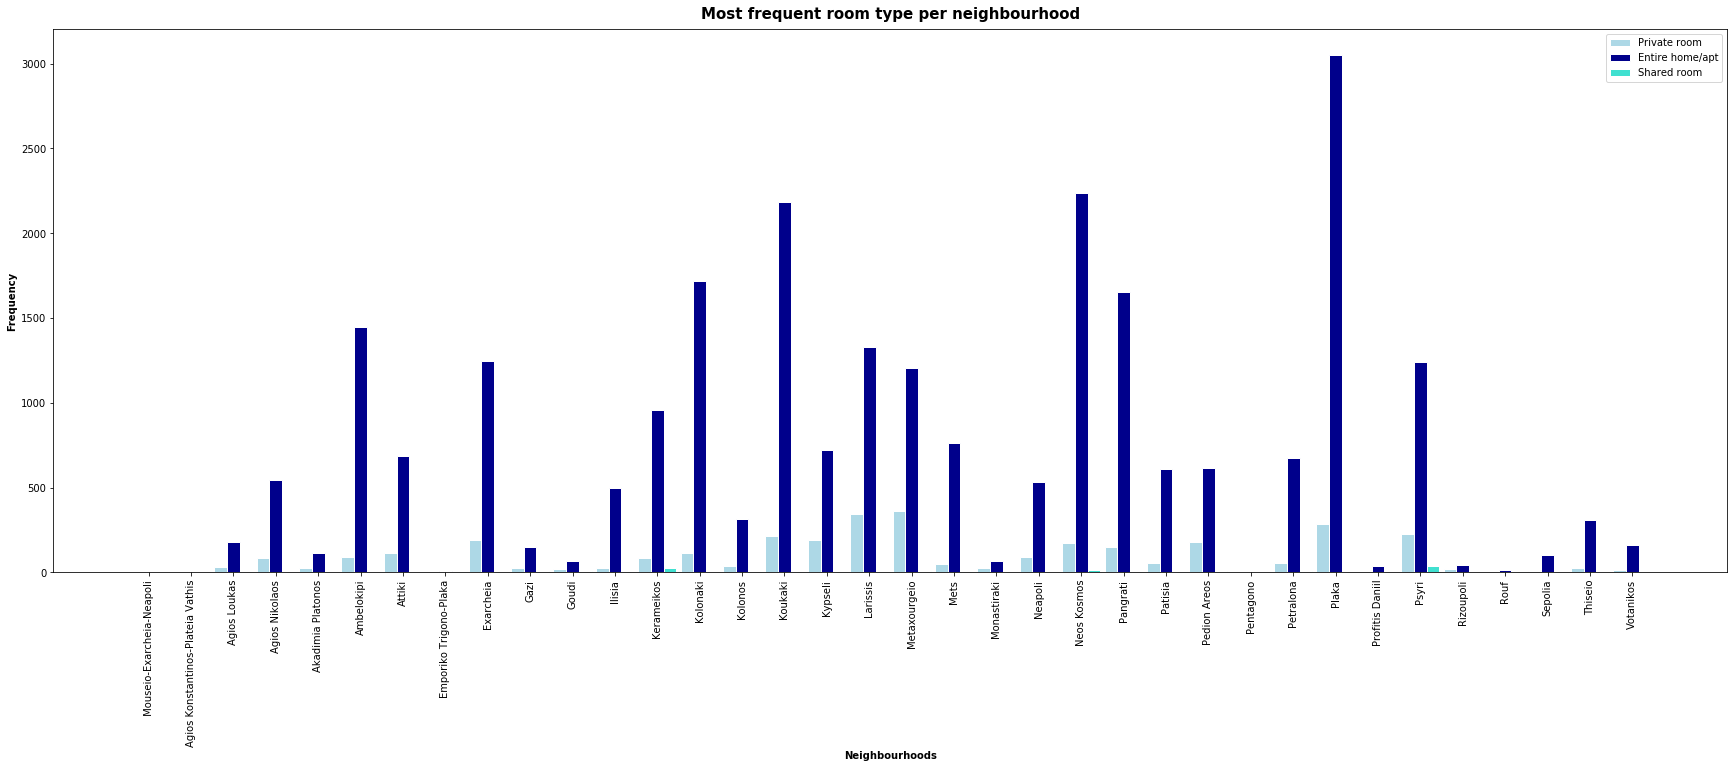

In [162]:
#7
d = {}
templist = []
aptList = []
privateRoomList = []
entireHomeAptList = []
tempDf = df[['room_type','neighbourhood','id']]
tempDf = tempDf.groupby(['neighbourhood','room_type']).agg({'id':'count'}).reset_index()
tempDf = tempDf.rename(columns = {'id':'Count'})
tempDf.apply(lambda row : templist.append(tuple([row['neighbourhood'],row['room_type'],row['Count']])),axis=1)

for neighbourhood,type,count in templist:
    d[neighbourhood] = {'Private room':0,'Entire home/apt':0,'Shared room':0}

for neighbourhood,type,count in templist:
    d[neighbourhood][type] = count

neighbourhoodList = [x for x in d.keys()]
for x in neighbourhoodList:
    privateRoomList.append(d[x]['Private room'])
    entireHomeAptList.append(d[x]['Entire home/apt'])
    aptList.append(d[x]['Shared room'])

barWidth = 0.3
plt.figure(figsize=(30,10))
# Set position of bar on X axis
r1 = np.arange(len(neighbourhoodList))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, privateRoomList, color='lightblue', width=barWidth, edgecolor='white', label='Private room')
plt.bar(r2, entireHomeAptList, color='darkblue', width=barWidth, edgecolor='white', label='Entire home/apt')
plt.bar(r3, aptList, color='turquoise', width=barWidth, edgecolor='white', label='Shared room')
 
# Add xticks on the middle of the group bars
plt.title('Most frequent room type per neighbourhood',fontweight='bold',fontsize=15,pad=10)
plt.xlabel('Neighbourhoods', fontweight='bold',fontsize=10)
plt.ylabel('Frequency', fontweight='bold',fontsize=10)
plt.xticks([r + 0.3 for r in range(len(neighbourhoodList))], neighbourhoodList,rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()

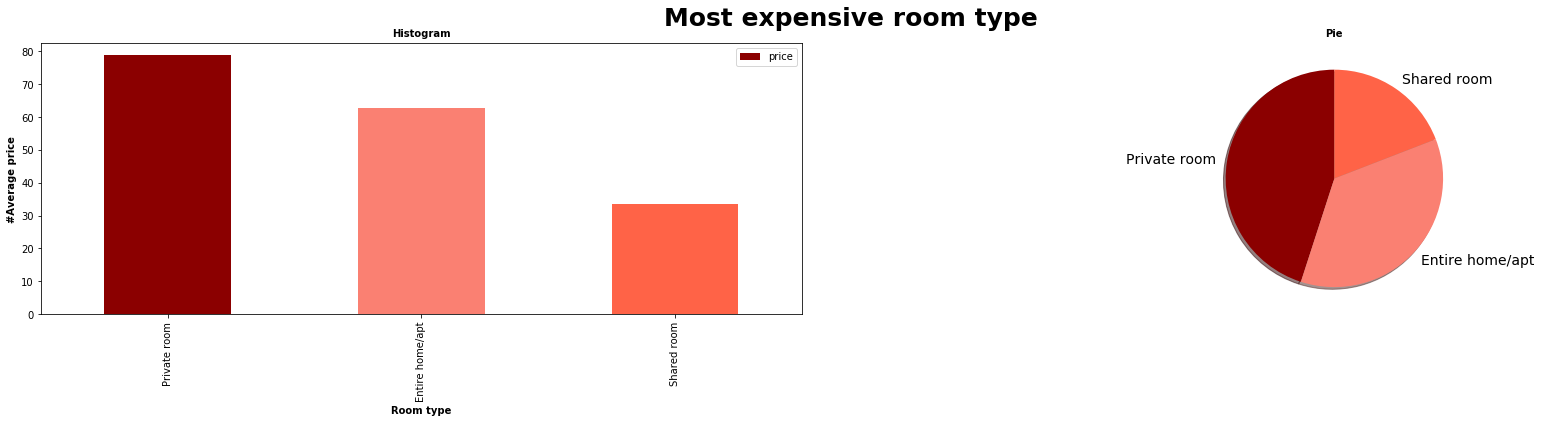

In [43]:
# 8
tempdf = df[['room_type','id','price']]
tempdf.drop_duplicates(subset='id',inplace=True)
temp = tempdf.groupby(by=['room_type'],as_index=False).agg({'price':'mean'}).sort_values(['price'],ascending=False,ignore_index=True)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Most expensive room type',fontweight='bold',fontsize=25)
temp.plot(kind='bar',x='room_type',y='price',color=['darkred','salmon','tomato'],figsize=(30,5),ax=ax1)
ax1.set_title('Histogram',fontweight='bold',fontsize=10)
ax1.set_ylabel('#Average price',fontweight='bold')
ax1.set_xlabel('Room type',fontweight='bold')
temp.plot(kind='pie',x='room_type',y='price',figsize=(30,5),startangle=90, shadow=True,colors=['darkred','salmon','tomato'], labels=temp['room_type'].unique(), legend = False,fontsize=14,ax=ax2)
ax2.set_title('Pie',fontweight='bold',fontsize=10)
ax2.set_ylabel('')
ax2.set_xlabel('')
fig.subplots_adjust(hspace=0.5)

In [100]:
# 9
latitude = []
longitude = []
tempdf = DataFrame(data=df[['latitude','longitude','id','price','bed_type','room_type','month_id']])
tempdf = tempdf.loc[tempdf['month_id'] == 'april']

latitude = tempdf['latitude'].tolist()
longitude = tempdf['longitude'].tolist()
price = tempdf['price'].tolist()
btype = tempdf['bed_type'].tolist()
rtype = tempdf['room_type'].tolist()

tooltip = 'Click me!'

m = fl.Map(location=[latitude[0],longitude[0]], zoom_start=12,tiles='Stamen Terrain')

for i, j in zip(range(1,100),range(1,100)):
    fl.Marker(location=[latitude[i], longitude[j]], icon=fl.Icon(color='red', icon='info-sign'),tooltip=tooltip,popup=('$'+str(price[i])+'\n'+str(rtype[i])+'\n'+str(btype[i]))).add_to(m)
m

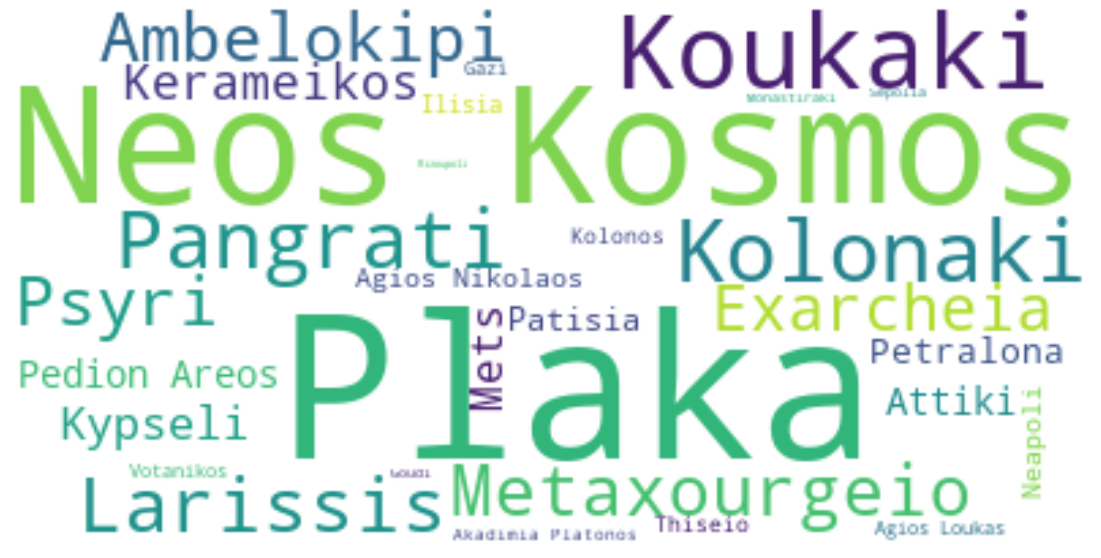

In [96]:
# 10 - neighbourhood

text = df['neighbourhood']
text = text.tolist()
tuples = collections.Counter(text)

words = WordCloud(background_color='white').generate_from_frequencies(frequencies=dict(tuples))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()



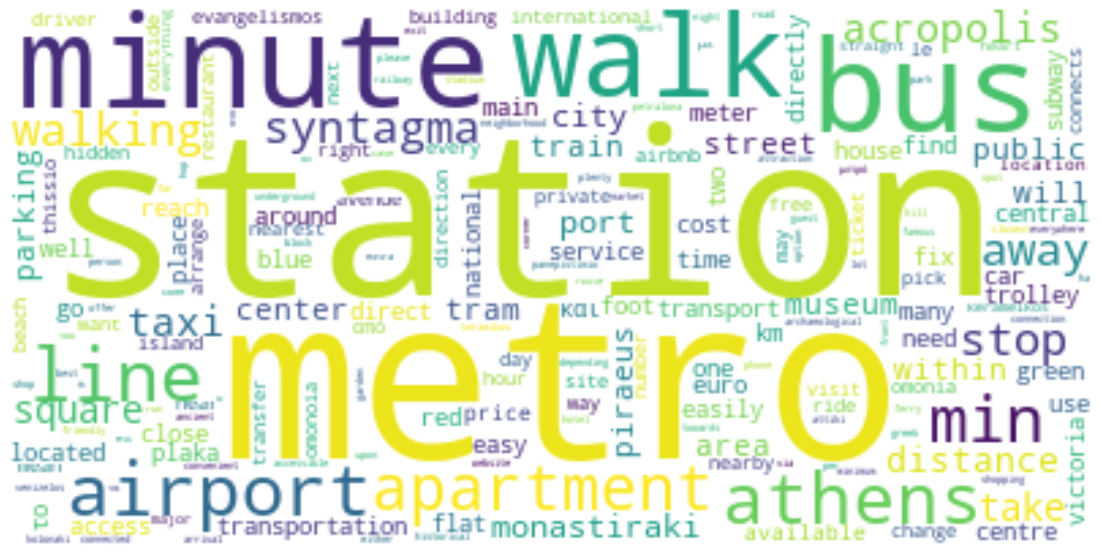

In [97]:
# 10 - transit

stopwords = set(STOPWORDS)
textWords = []
for x in df['transit']:
    for y in word_tokenize(x) :
        y = y.lower()
        y = WordNetLemmatizer().lemmatize(y)
        if (y not in stopwords) and y.isalpha():
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()


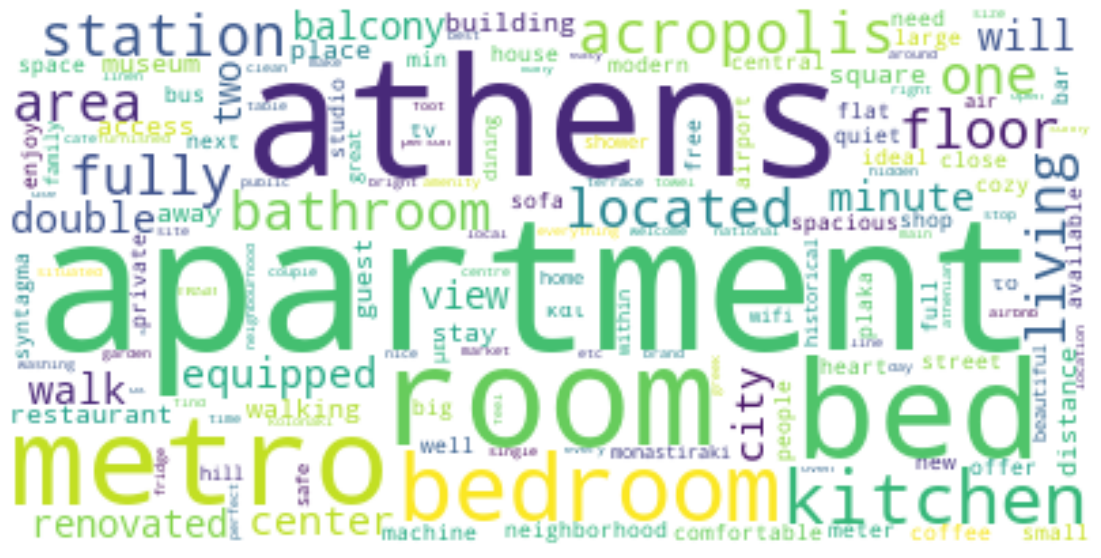

In [99]:
# 10 - description

stopwords = set(STOPWORDS)
textWords = []
for x in df['description']:
    for y in word_tokenize(x) :
        y = y.lower()
        if (y not in stopwords) and (y not in stopwords) and y.isalpha():
            y = WordNetLemmatizer().lemmatize(y)
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()


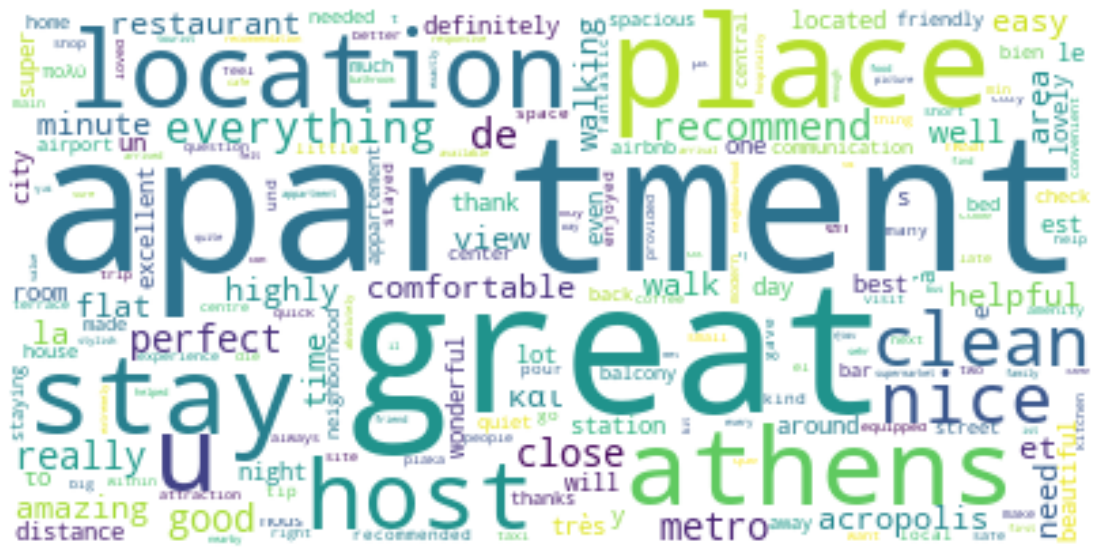

In [139]:
# 10 - last_review

temp = df['last_review']
dates = temp.tolist()
temp = df['id']
ids = temp.tolist()

rev = DataFrame(data=reviews[['date','comments','listing_id']])
temp  = rev.loc[(rev['date'].isin(dates)) & (rev['listing_id'].isin(ids))]

stopwords = set(STOPWORDS)
textWords = []
for x in temp['comments']:
    for y in word_tokenize(x) :
        y = y.lower()
        if (y not in stopwords) and y.isalpha():
            y = WordNetLemmatizer().lemmatize(y)
            textWords.append(y)
            
counter = collections.Counter(textWords)
words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
# 12-a
sbn.set(color_codes=True)
f, axes = plt.subplots(3,figsize=(9, 9), sharex=True, sharey=True)

for ax, s in zip(axes.flat, np.linspace(0, 1000, 100)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sbn.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    # x, y = rs.randn(2, 50)
    sbn.kdeplot(df['price'], df['review_scores_rating'], cmap=cmap, shade=True, cut=5, ax=ax)
    # ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

# sbn.relplot(y="review_scores_rating",x="price",hue="month_id",size="number_of_reviews",height=10,palette="Set1", markers=True, sizes=(100,10),edgecolor=".2", linewidth=.5, alpha=1,aspect=.7,kind="scatter",data=df)
# plt.show()

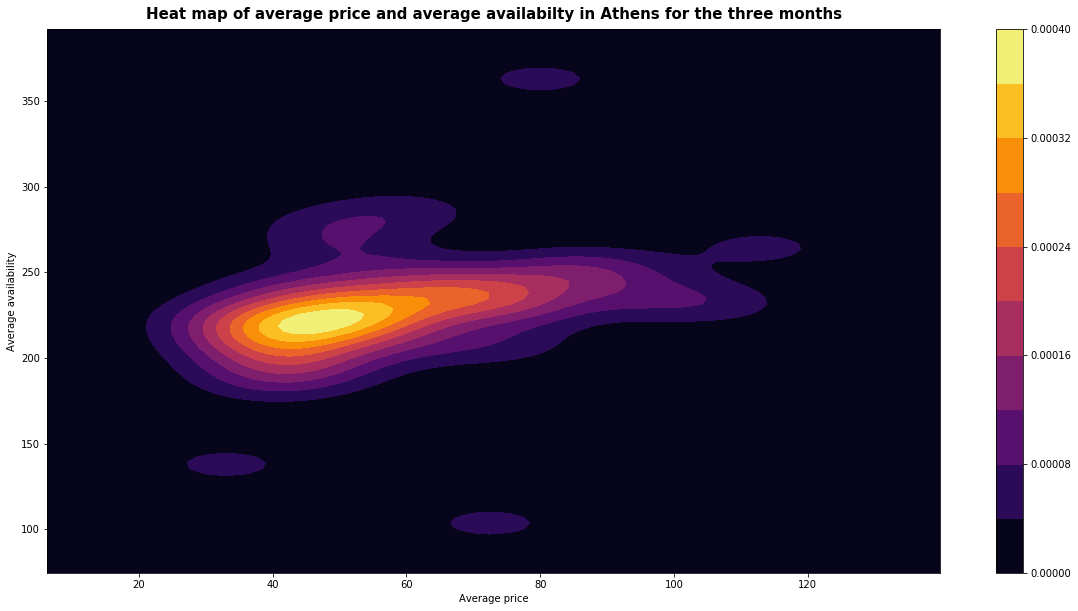

In [138]:
# 12-b
tempdf = df.drop_duplicates('id')
neighbourhoodsCost = tempdf.groupby('neighbourhood').agg({'price':'mean','availability_365':'mean','id':'count'}).reset_index()
neighbourhoodsCost = neighbourhoodsCost.rename(columns = {'price':'Average price','availability_365':'Average availability','id':'#hotels'})
plt.figure(figsize = (20,10))
plt.title('Heat map of average price and average availabilty in Athens for the three months',fontweight='bold',fontsize=15,pad=10)
sbn.kdeplot(data= neighbourhoodsCost['Average price'],data2=neighbourhoodsCost['Average availability'],cbar=True,nlevels=50,cmap="inferno",shade=True,bw='silverman',gridsize=100)